## Model lasy drzew decyzyjnych

### 1. Argumenty za przyjęciem modelu lasu drzew decyzyjnych:
- zdolność radzenia sobie z dużą liczbą cech
- ddolność uwzględniania nieliniowych relacji
- duża odporność na nadmierne dopasowanie
- łatwość interpretacji

### 2. Import bibliotek oraz danych z plików .csv

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Wczytanie danych z pliku CSV (X_test.csv, X_train.csv, y_test.csv, y_train.csv)
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Wyswietl informacje o danych
print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)

X_train shape:  (928, 8) y_train shape:  (928, 1)
X_test shape:  (398, 8) y_test shape:  (398, 1)


### 3. Narysowanie histogramów opisujących częstotliwości występowania poziomów każdej cechy

In [5]:
#definicja metody rysującej diagramy dla kazdej cechy
def draw_frequency_diagram(X_train, X_test):

    #Do celów prezentacji danych łączymy tymaczasowo dane treningowe i testowe w jednym DataFrame
    X_combined = pd.concat([X_train, X_test], ignore_index=True)

    num_columns = X_combined.shape[1]

    # Narysuj histogram
    for i in range(num_columns):
        column_data = X_combined[X_combined.columns[i]] 
        plt.hist(column_data, bins=20, color='skyblue', edgecolor='black')
        plt.xlabel(X_combined.columns[i])
        plt.ylabel('Częstotliwość')
        plt.title(f'Histogram dla {X_combined.columns[i]}')
        plt.show()

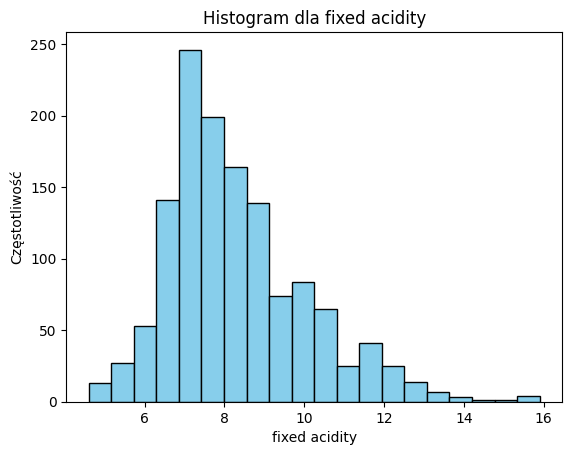

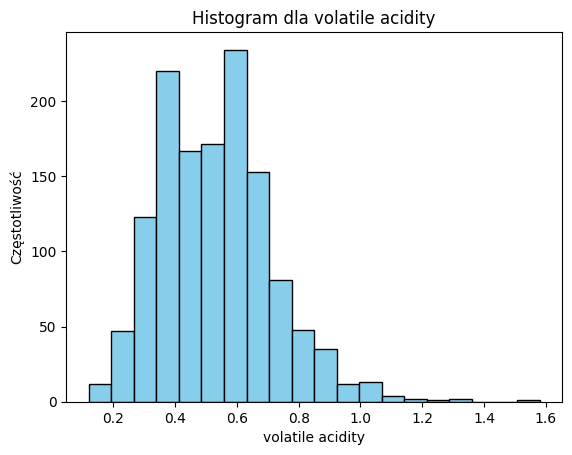

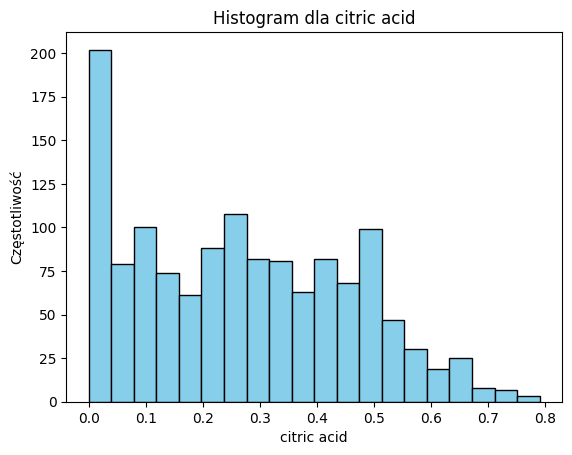

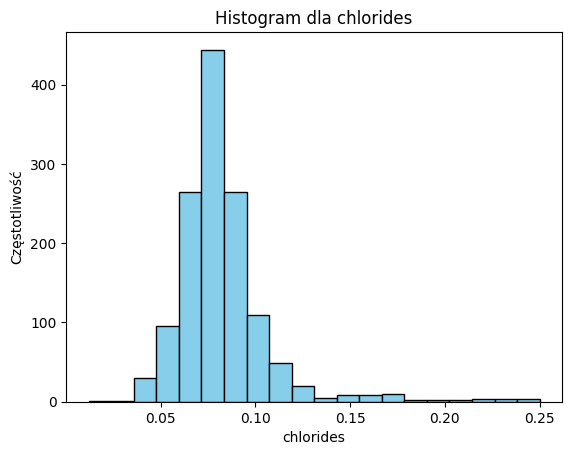

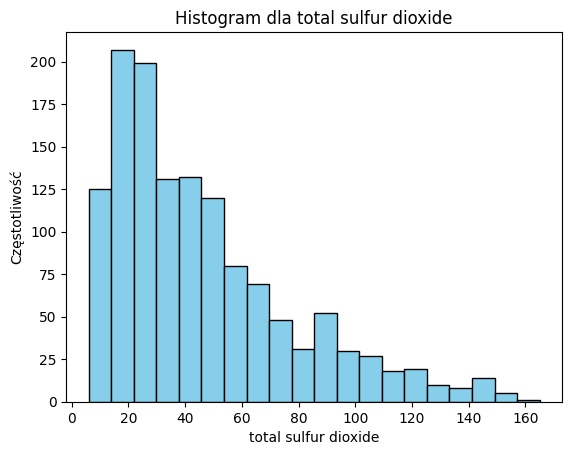

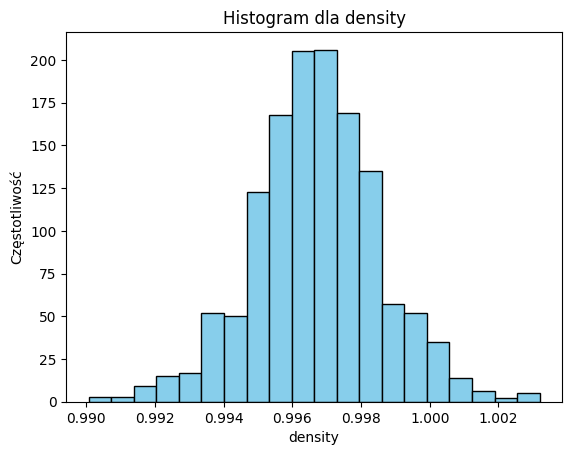

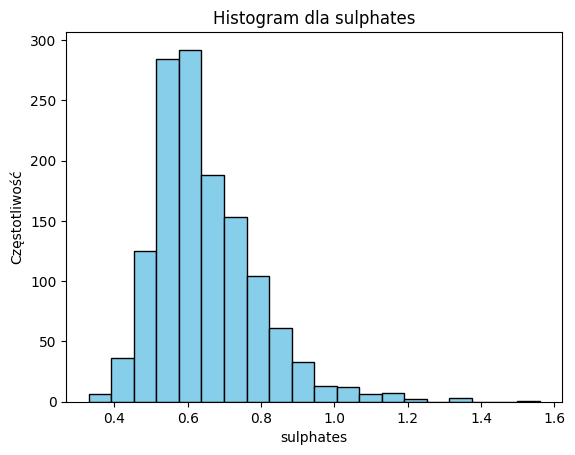

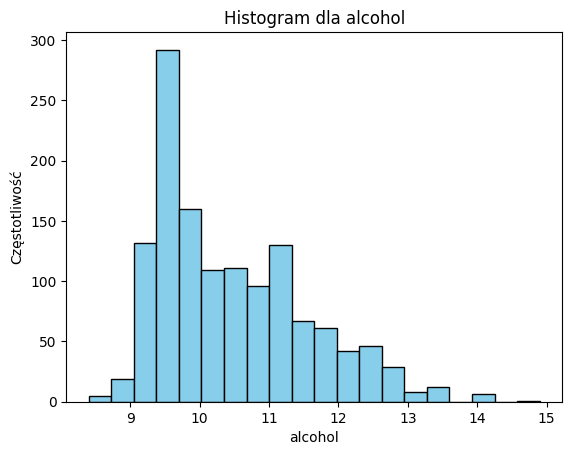

In [6]:
draw_frequency_diagram(X_train, X_test)

### 4. Utworzenie i uczenie modelu

In [7]:
#Utworzenie i trening modelu
rf = RandomForestClassifier(n_estimators=7, random_state=42, max_depth=8)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### 5. Ocena parametrów jakościowych modelu

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Oblicz raport klasyfikacji
report = classification_report(y_test, y_pred)

# Wyświetl raport
print(report)

Accuracy: 0.6055276381909548
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        18
           5       0.69      0.74      0.72       172
           6       0.53      0.64      0.58       151
           7       0.59      0.33      0.42        51
           8       0.00      0.00      0.00         5

    accuracy                           0.61       398
   macro avg       0.30      0.29      0.29       398
weighted avg       0.57      0.61      0.58       398



C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

### 6. Prezentacja diagramu lasu drzew decyzyjnych
(generacja trwa około 30 sekund, prosze o cierpliwość)

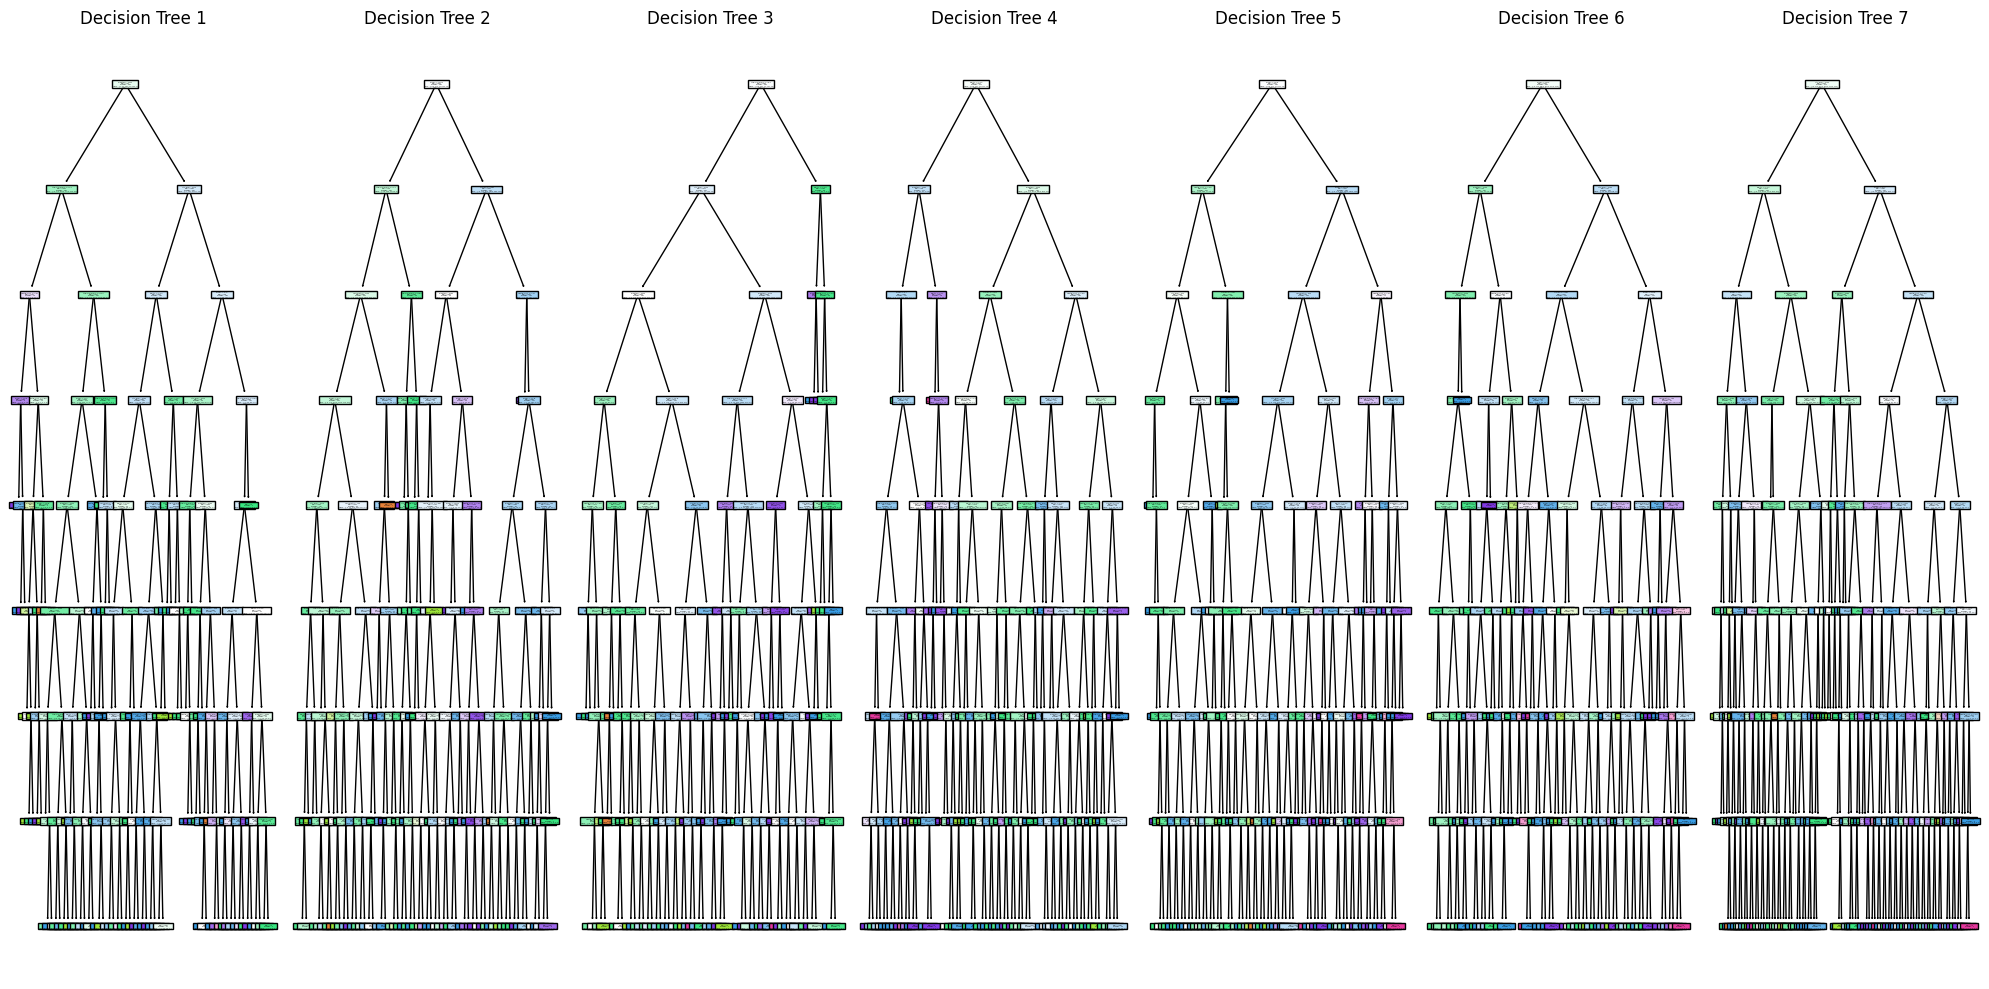

In [9]:
Y_combined = pd.concat([y_train, y_test], ignore_index=True)
class_names = Y_combined['quality'].unique().tolist()
class_names_str = list(map(str, class_names)) 


plt.figure(figsize=(20, 10))
for i in range(len(rf.estimators_)):
    plt.subplot(1, len(rf.estimators_), i + 1)
    plot_tree(rf.estimators_[i], feature_names=X_test.columns.tolist(), class_names=class_names_str, filled=True)
    plt.title(f'Decision Tree {i+1}')

plt.tight_layout()
plt.show()

### 7. Wyświetlenie macierzy pomyłek modelu

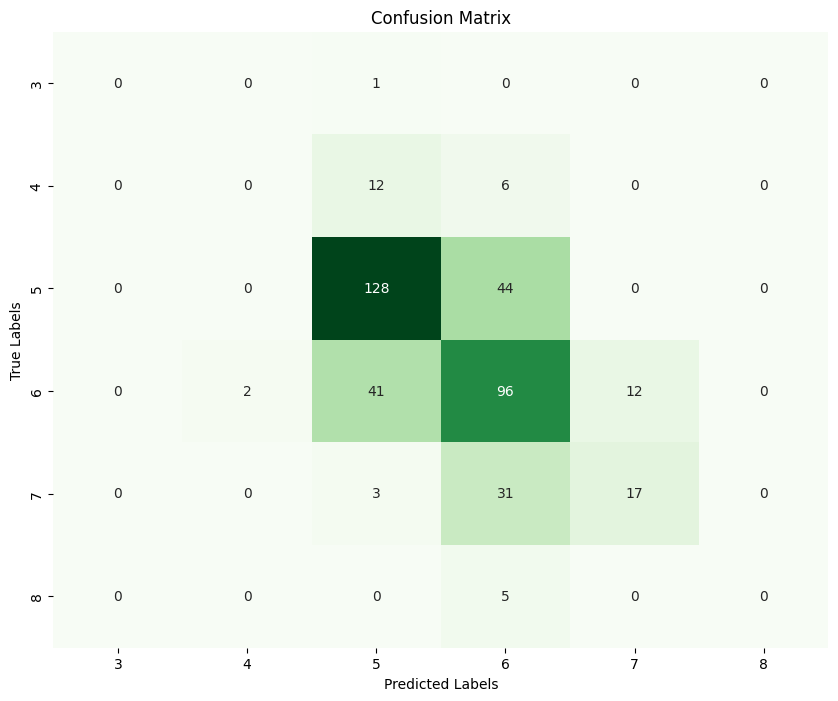

In [17]:
# Tworzenie macierzy pomyłek
cm = confusion_matrix(y_test, y_pred)

# Mapowanie indeksów na odpowiadające im oceny wina
labels = ['3', '4', '5', '6', '7', '8',]

# Wyświetlenie macierzy pomyłek
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', cbar=False, xticklabels = labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### 8. Podsumowanie

## **Ocena Modelu**

Model pozostawia wiele do życzenia. Ogólna dokładność modelu wynosi w przybliżeniu ~0.6, co nie jest wynikiem powalającym. Sytuacja nie poprawia się, gdy przyjżymy się prezycji oceny poszczególnych poziomów jakości. Okazuje się, że model posiada dość wysoki poziom prezycji jedynie dla oceny jakości 5, a w dodatku nie przewidział *żadnych* poziomów jakości poza 5, 6 i 7. Dodatkowo, model posiada niezadawalająco niski poziom czułości dla oceny jakości 7 oraz miskie oceny F1-score dla poziomów jakości 6 i 7 (nie wspominając nawet o poziomach, do których nie dobrał żadnego przypadku, pomimo ich obecności w wylosowanym zbiorze testowym).

## **Rekomendacje**
- oversampling/undersampling: wina o poziomie jakości 5 i 6 zdecydowanie dominują w danych, co przekłada się na niski wynik precyzji i czułości dla pozostałych poziomów jakości, z których wiele jest całkowicie ignorowane. Wyrównanie liczby przypadków dla każdego poziomu jakości powinna zdecydowanie poprawić wyniki modelu
- inżynieria cech: można ponownie spojrzeć na etap przygotowania danych i zmodyfikować lub połączyć istniejące cechy, a także usunąć te stastystycznie nieistotne, jeśli takowe się zachowały
- zastosowanie walidacji krzyżowej: pozwoli na bardziej wiarygodną ocenę jakości modelu
- wykorzystanie innych modeli: rozważyć można wykorzystanie innych modeli wykorzystywanych do problemów klasyfikacji, takich jak KNN, SVM czy naiwny klasyfikator bayesowski
